In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/MyDrive/FaceRecognitionSystem'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1nEMgCuEaB9Z2mY0pJaTYzIr0iH9jG6rm/FaceRecognitionSystem


In [2]:
!pip install mediapipe

> # Build Gallery Embedding Database

In [8]:
!python build_gallery.py

data samples: 22971
Loaded 22971 images with shape ().
2025-05-19 07:14:20.880890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747638860.901094   18930 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747638860.907445   18930 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-19 07:14:20.928140: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-19 07:14:23.863364: W tensorflow/core/common_runtime/g

> # Visual Identities

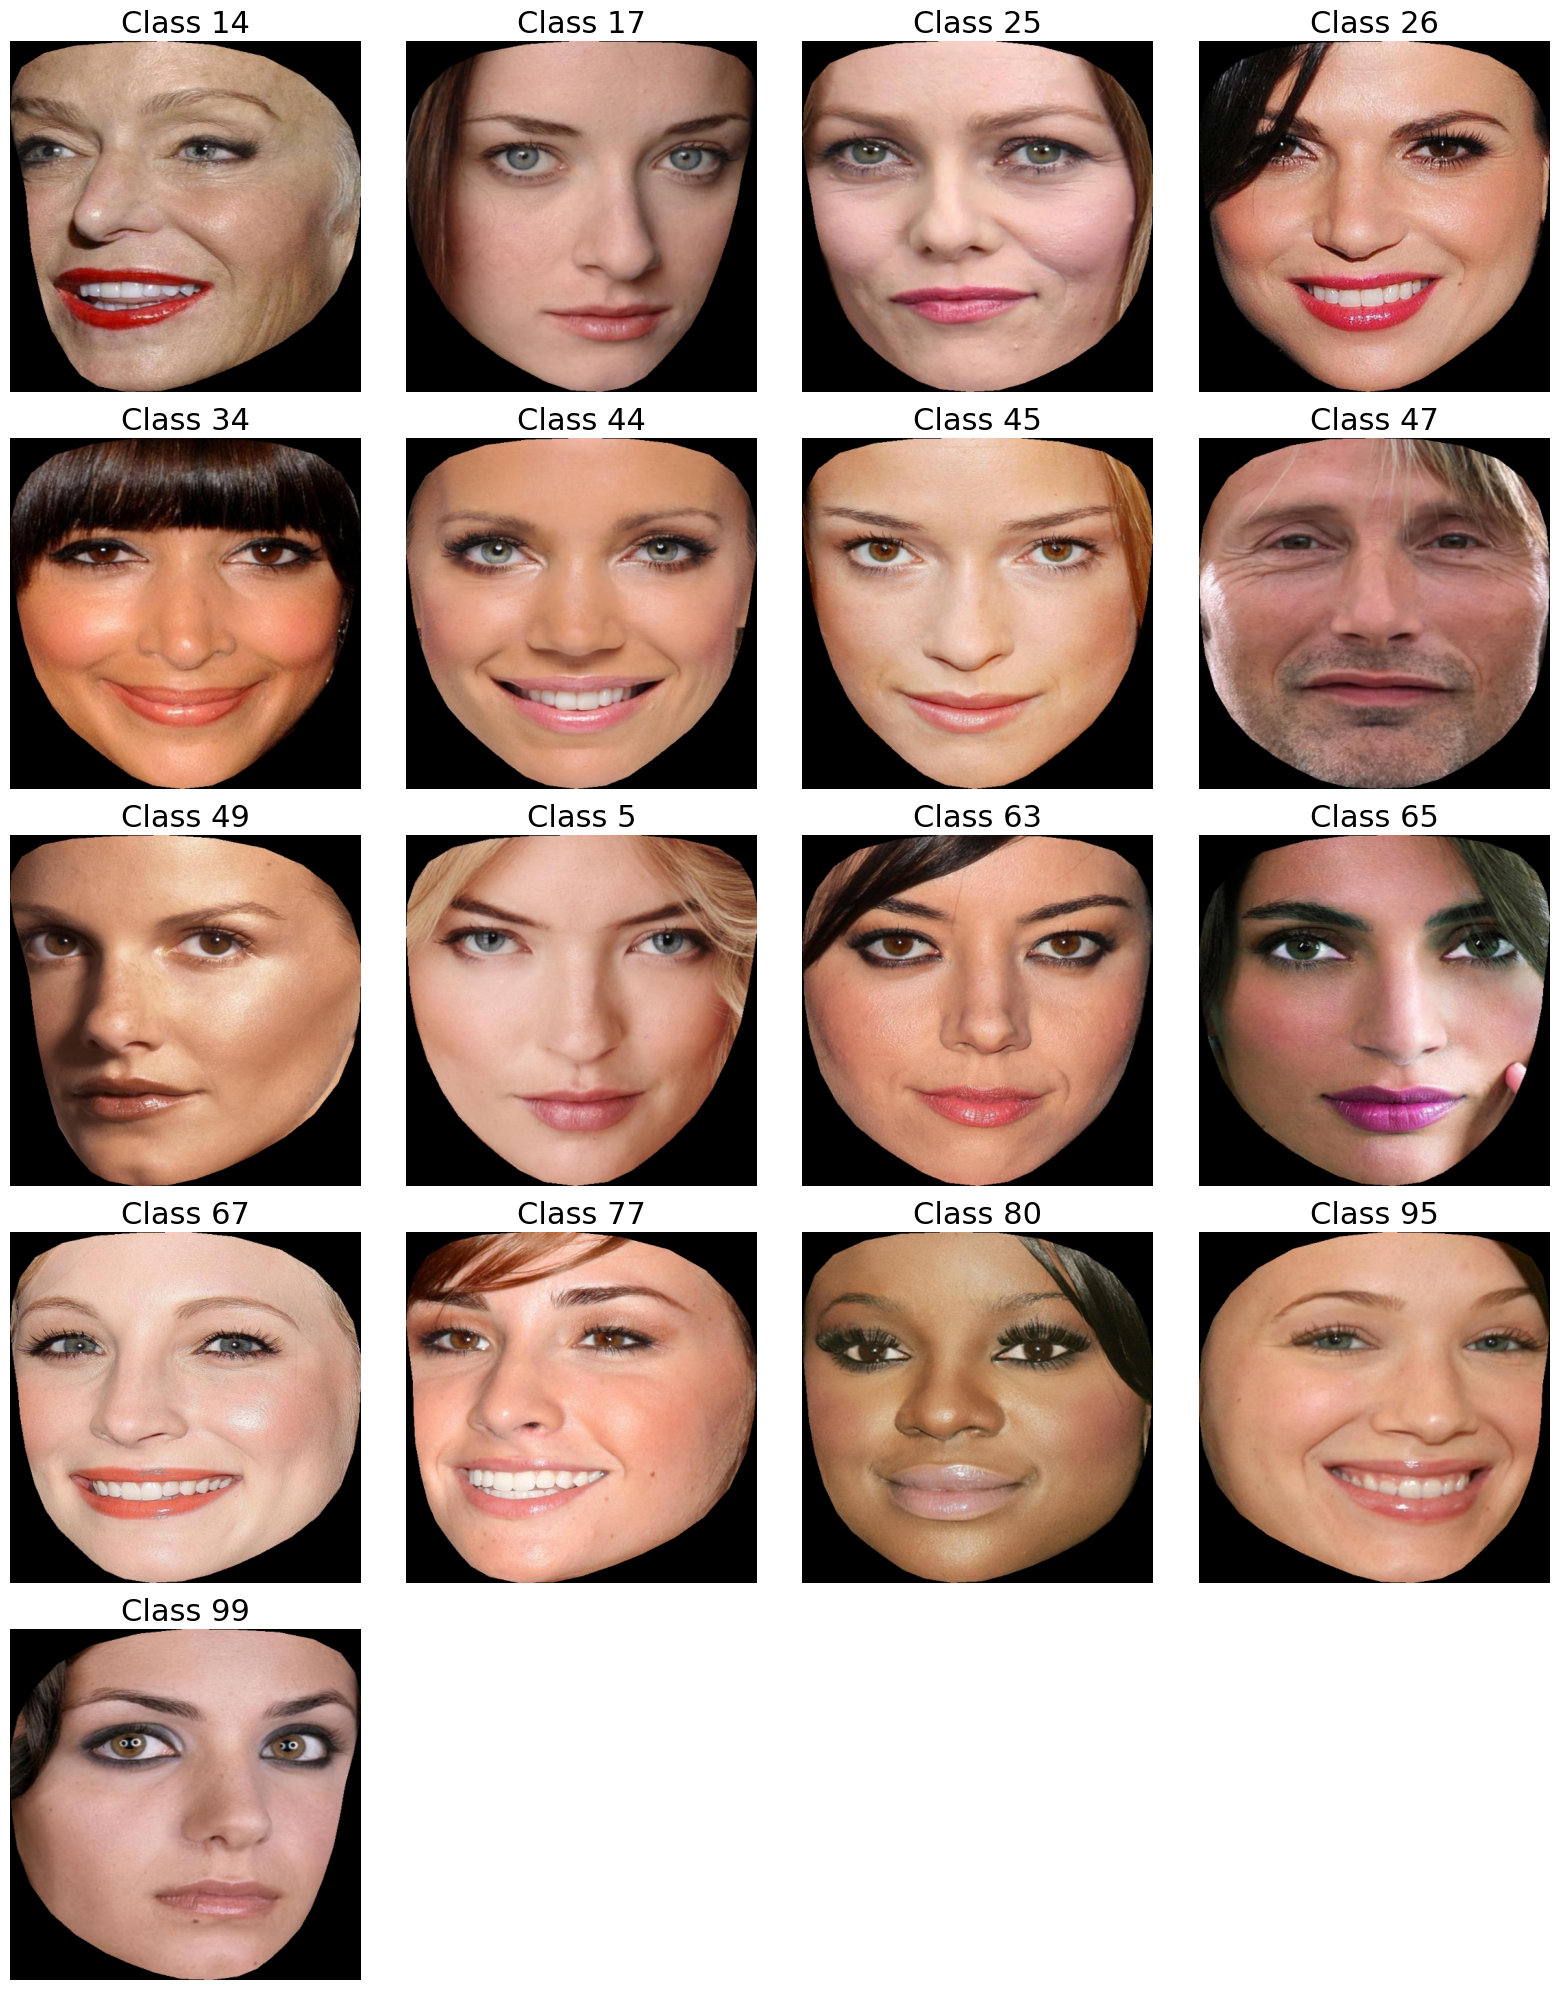

In [24]:
import os
import matplotlib.pyplot as plt
import cv2

dataset_path = "/content/drive/MyDrive/FaceRecognitionSystem/CelebA_HQ_facial_aligment/test"
class_folders = sorted(os.listdir(dataset_path))

cols = 4
rows = (len(class_folders) + cols - 1) // cols
plt.figure(figsize=(cols * 4, rows * 4))  # Bigger per image

for idx, class_name in enumerate(class_folders):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        continue

    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        continue

    plt.subplot(rows, cols, idx + 1)
    image_path = os.path.join(class_path, image_files[0])
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f"Class {class_name}", fontsize=22)
    plt.axis('off')

plt.tight_layout()
plt.show()


> # Prediction

2025-05-19 07:59:42.613900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747641582.633647   42858 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747641582.639712   42858 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-19 07:59:42.659787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg

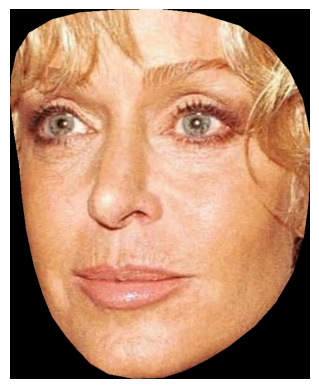

In [27]:
image_path = "CelebA_HQ_facial_aligment/train/14/10103.jpg"
!python inference.py --input "CelebA_HQ_facial_aligment/train/14/10103.jpg"

img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()